<br><font face = "Times New Roman" size = "4"> <b>Name: Sankul Pandey  DS0722
<br><font face = "Times New Roman" size = "4"> <b>Email: sankul99@gmail.com
    
    
    
    
    


<br><font face = "Muller Text" size = "8"> <b> Avocado Project 
    
    
    
    

<br><font face = "TImes New Roman" size = "4"> <b> Problem Statement
    
    

Avocadoes are an ethnic fruit that are mostly consumed in the continent of North America.It's a green coloured fruit that is bland in taste and is used to make miltiple mexican dishes, tortilla and chips.

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled 
into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar 
and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset: 

 Date - The date of the observation

 AveragePrice - the average price of a single avocado

 type - conventional or organic

 year - the year

 Region - the city or region of the observation

 Total Volume - Total number of avocados sold

 4046 - Total number of avocados with PLU 4046 sold

 4225 - Total number of avocados with PLU 4225 sold

 4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file.

Dataset Link-

https://github.com/dsrscientist/Data-Science-ML-CapstoneProjects/blob/master/avocado.csv.zi

# 1) Necessary Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle 
import warnings 
warnings.filterwarnings('ignore')

# 2) Importing Data 

In [2]:
df = pd.read_csv(r"C:\Users\sanku\OneDrive\Desktop\Avocado\avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df['Date']=pd.to_datetime(df['Date'])
df['month']= pd.DatetimeIndex(df['Date']).month

In the above command, Assuming that the values in the "Date" column has string using the following 
command we will be converting these strings into a pandas date and date object which 
will aid us to manipulate and extract and use the data accordingly.

Also we will be creating a new column "month" .We will from this extract the value 
of the month from the data column of the data and these values in the data frame will 
only stay between the values 1 and 12 for obvious reasons 

In [4]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


We in turn have to drop the the unnamed column to aid our analysis
along with it we will also be dropping the data column as we already have the 
value of month already extracted and in column with us 

In [5]:
dfmain = df.drop(['Unnamed: 0', 'Date',], axis=1)
dfmain.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


# 3) Check data types of each column present in the dataset 


In [6]:
dfmain.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
month             int64
dtype: object

# 4) Checking for Null values 

In [7]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
dtype: int64

In [8]:
# CGecking for duplicates in the following dataset 

dupli = df[df.duplicated()]
print("Duplicate Rows are :")

Duplicate Rows are :


<br><font face = "Arial" size = "3"> <b> Hence there are no duplicates present in the dataset 
as checked above 

<br><font face = "Muller Text" size = "3"> <b> Up until now we understood that the following dataset 
has no repeating values and apart from that we also understood what the various columns in the dataset mean
such as 

1. Total bags tells us the number of bags of avocadoes that are sold 

2. small bags tells us the number small bags that re sold 

3. 4225,4770,4046 tells us about the about the avocadoes sold wiht the following PLU

PLU is the the specific number that is given to avocadoes in order to identify the retail at which 
they were sold. 

4. Type , year and many other such columns tell us more the data set 

Our target variable is average price and we understood up until now that it is 
of the continuous nature so it will be considered as a regression problem. 


# 5) Descriptive statistics of the dataset 

In [9]:
dfmain.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000


# 6) EDA or Visualisation analysis 

<AxesSubplot:>

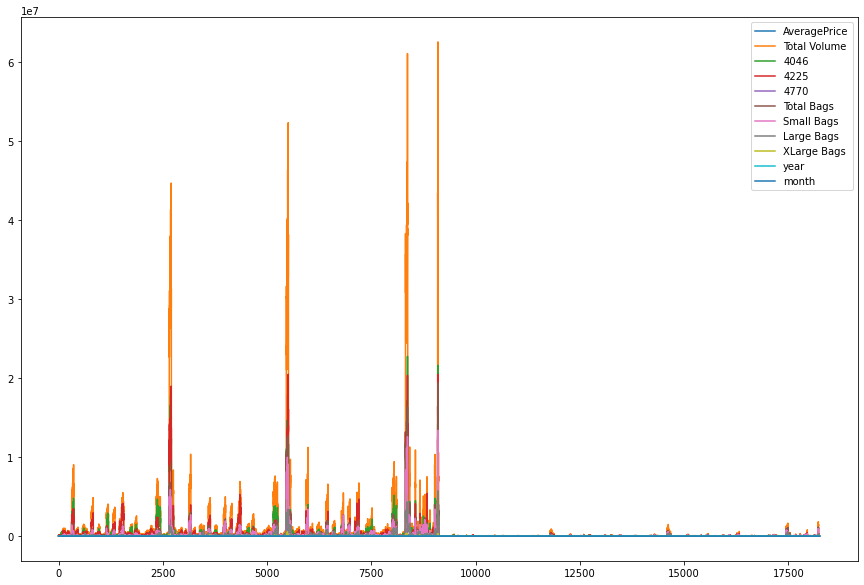

In [10]:
dfmain.plot.line(figsize=(15,10))

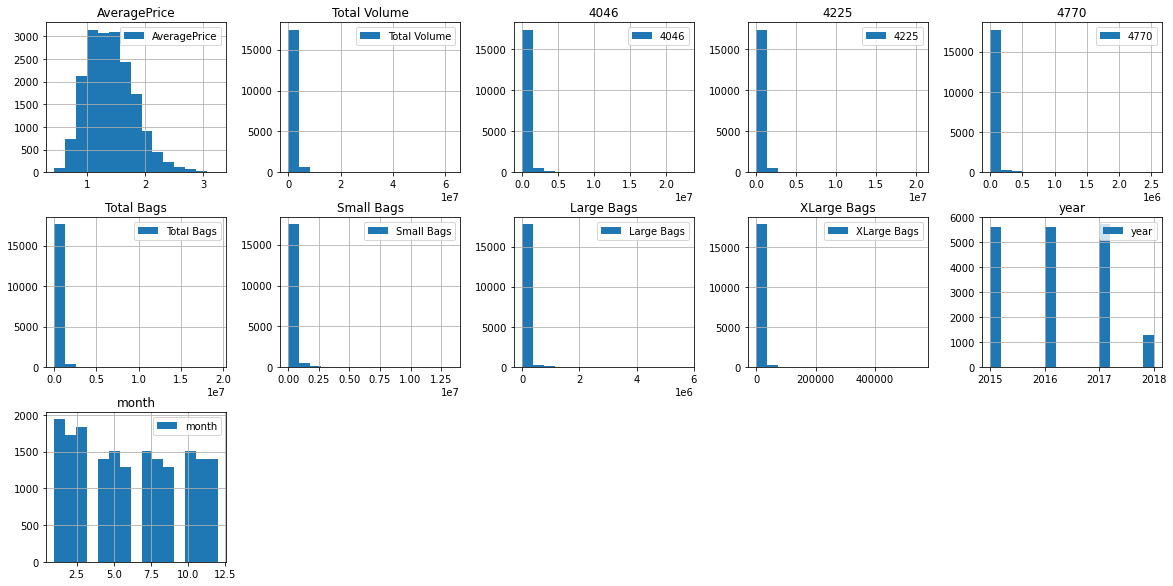

In [11]:
dfmain.hist(figsize=(20,35),layout=(10,5),bins=15,legend=True)
plt.show()

In [12]:
def VIZ(columns): #writing a function will help in running multiple codes 
    print(columns)
    print(dfmain[columns].describe())
    plt.plot()
    sns.distplot(dfmain[columns]) #Checking for skewness 
    plt.show()
    plt.plot()
    dfmain[columns].hist(grid=True) #Histogram to helps us check for the scale 
    plt.show()
    plt.plot()
    sns.boxplot(dfmain[columns]) #boxplot helps us to check for the outliers
    plt.show()

AveragePrice
count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64


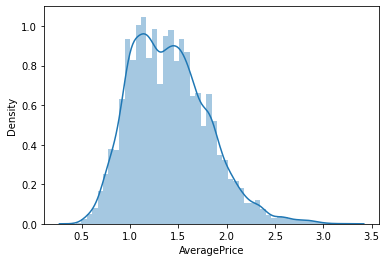

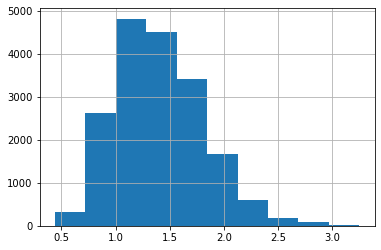

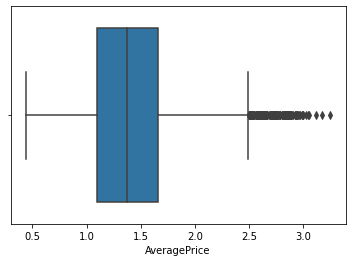

In [13]:
VIZ('AveragePrice') #Out target variable 

<br><font face = "Arial" size = "2"> <b> It seems in the above analysis that there is some kind of skewness in the data along with the presence of outliers. we will try and confirm it in the analysis of the next column 

4046
count    1.824900e+04
mean     2.930084e+05
std      1.264989e+06
min      0.000000e+00
25%      8.540700e+02
50%      8.645300e+03
75%      1.110202e+05
max      2.274362e+07
Name: 4046, dtype: float64


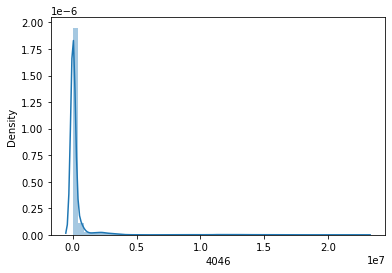

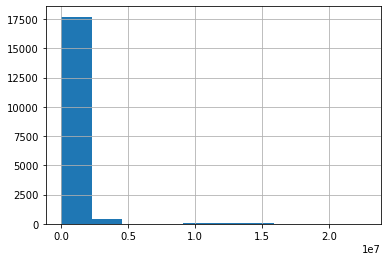

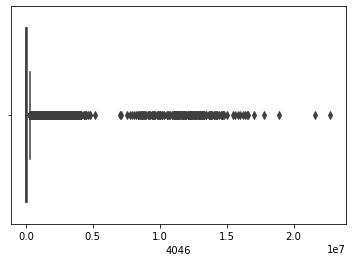

In [14]:
VIZ('4046')

<br><font face = "Arial" size = "3"> <b> Yes it is confirmed that there is skewness and outliers present. We will undergo and do analysis for all the columns 

4225
count    1.824900e+04
mean     2.951546e+05
std      1.204120e+06
min      0.000000e+00
25%      3.008780e+03
50%      2.906102e+04
75%      1.502069e+05
max      2.047057e+07
Name: 4225, dtype: float64


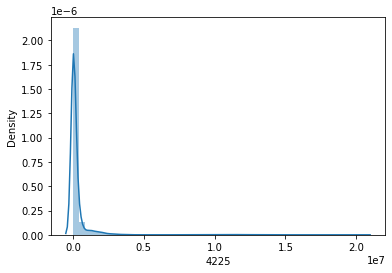

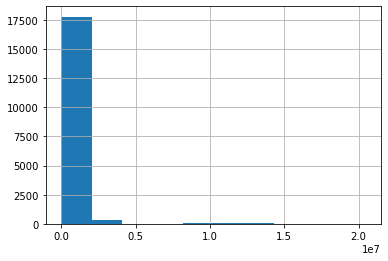

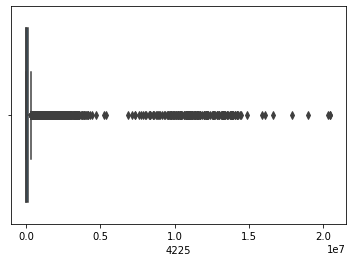

In [15]:
VIZ('4225')

4770
count    1.824900e+04
mean     2.283974e+04
std      1.074641e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.849900e+02
75%      6.243420e+03
max      2.546439e+06
Name: 4770, dtype: float64


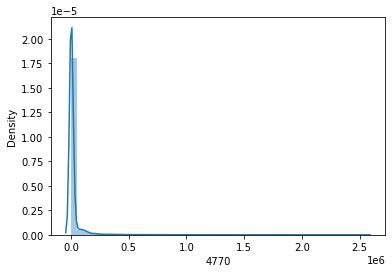

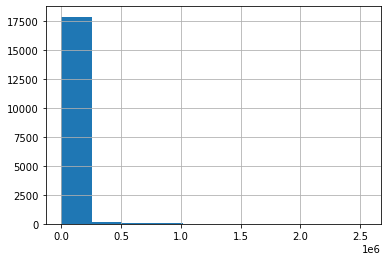

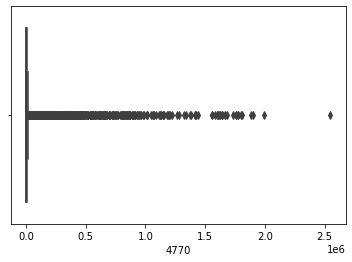

In [16]:
VIZ('4770')

Total Bags
count    1.824900e+04
mean     2.396392e+05
std      9.862424e+05
min      0.000000e+00
25%      5.088640e+03
50%      3.974383e+04
75%      1.107834e+05
max      1.937313e+07
Name: Total Bags, dtype: float64


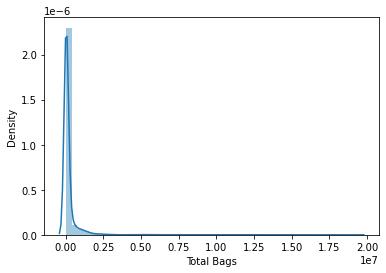

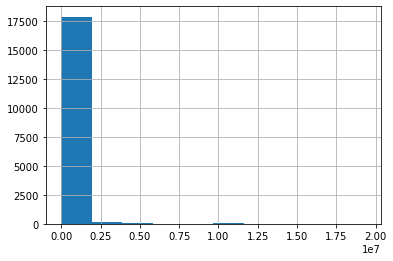

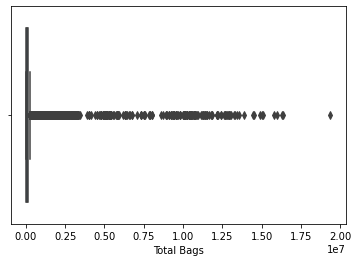

In [17]:
VIZ('Total Bags')

Small Bags
count    1.824900e+04
mean     1.821947e+05
std      7.461785e+05
min      0.000000e+00
25%      2.849420e+03
50%      2.636282e+04
75%      8.333767e+04
max      1.338459e+07
Name: Small Bags, dtype: float64


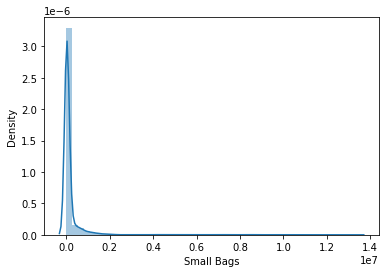

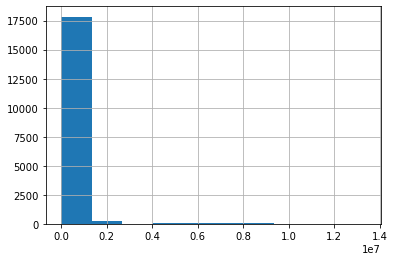

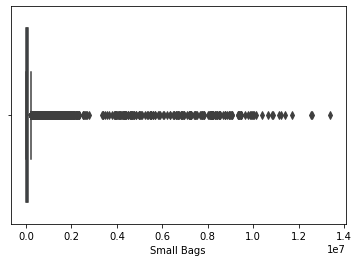

In [18]:
VIZ('Small Bags')

Large Bags
count    1.824900e+04
mean     5.433809e+04
std      2.439660e+05
min      0.000000e+00
25%      1.274700e+02
50%      2.647710e+03
75%      2.202925e+04
max      5.719097e+06
Name: Large Bags, dtype: float64


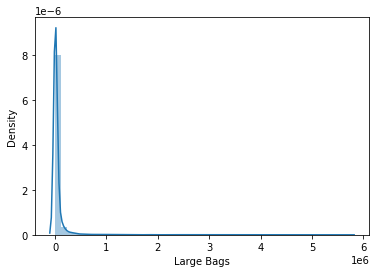

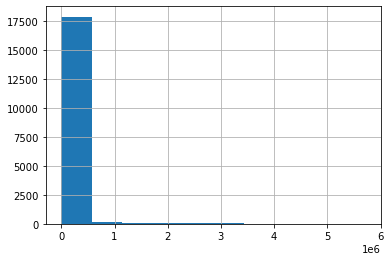

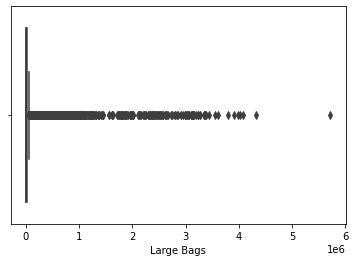

In [19]:
VIZ('Large Bags')

XLarge Bags
count     18249.000000
mean       3106.426507
std       17692.894652
min           0.000000
25%           0.000000
50%           0.000000
75%         132.500000
max      551693.650000
Name: XLarge Bags, dtype: float64


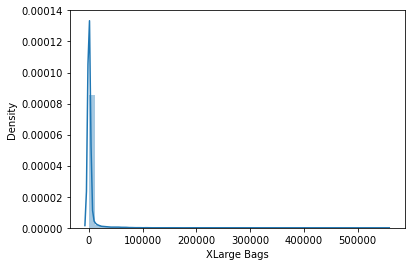

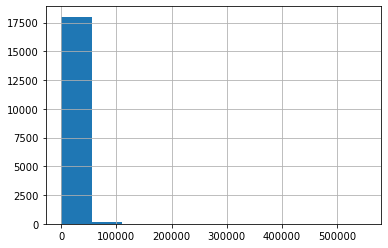

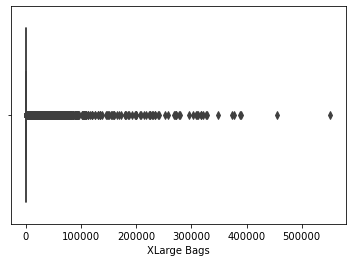

In [20]:
VIZ('XLarge Bags')

<br><font face = "Arial" size = "2"> <b> The remaining values in the columns are Single Categorical Values. What this means is that they have a limit to the values they can amount to take. We will proceed with analysis of these columns below 

year
count    18249.000000
mean      2016.147899
std          0.939938
min       2015.000000
25%       2015.000000
50%       2016.000000
75%       2017.000000
max       2018.000000
Name: year, dtype: float64


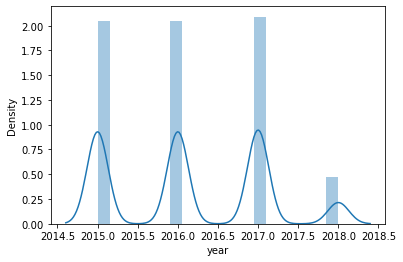

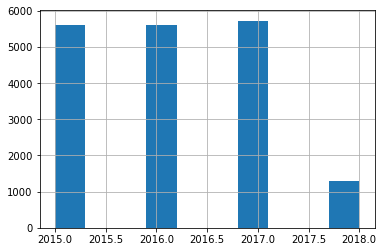

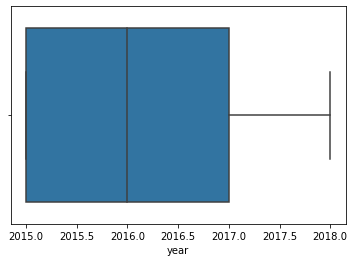

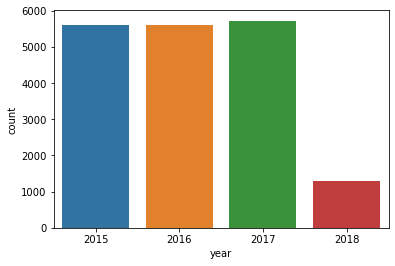

In [21]:
VIZ('year')
sns.countplot(x ='year', data = dfmain)
plt.show()

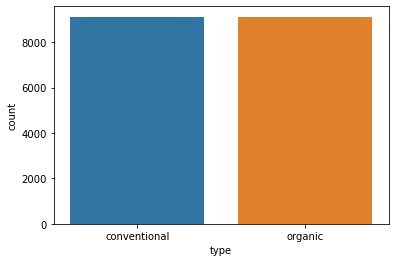

In [22]:
sns.countplot(x ='type', data = df)
plt.show()

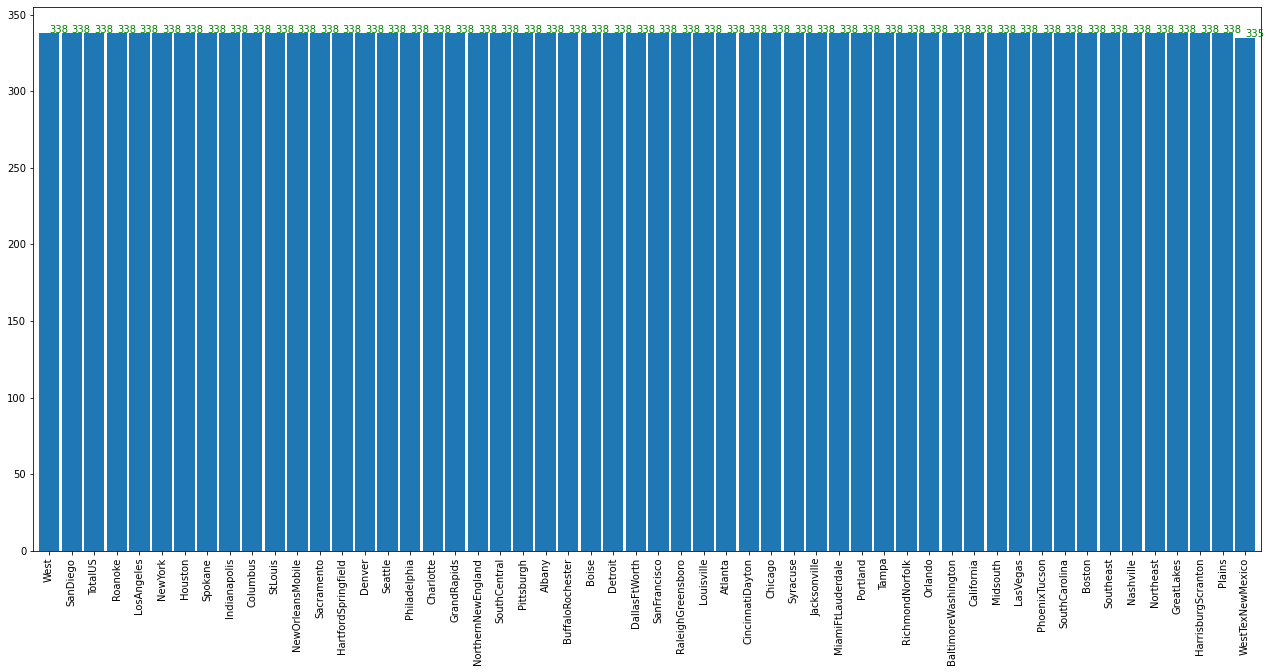

In [23]:
plt.figure(figsize=(22,10))
s = dfmain['region'].value_counts()
ax=s.plot.bar(width=.9) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.region + 0.2 , v.region, color='green')
plt.show()

[Text(0, 0, 'Albany'),
 Text(1, 0, 'Atlanta'),
 Text(2, 0, 'BaltimoreWashington'),
 Text(3, 0, 'Boise'),
 Text(4, 0, 'Boston'),
 Text(5, 0, 'BuffaloRochester'),
 Text(6, 0, 'California'),
 Text(7, 0, 'Charlotte'),
 Text(8, 0, 'Chicago'),
 Text(9, 0, 'CincinnatiDayton'),
 Text(10, 0, 'Columbus'),
 Text(11, 0, 'DallasFtWorth'),
 Text(12, 0, 'Denver'),
 Text(13, 0, 'Detroit'),
 Text(14, 0, 'GrandRapids'),
 Text(15, 0, 'GreatLakes'),
 Text(16, 0, 'HarrisburgScranton'),
 Text(17, 0, 'HartfordSpringfield'),
 Text(18, 0, 'Houston'),
 Text(19, 0, 'Indianapolis'),
 Text(20, 0, 'Jacksonville'),
 Text(21, 0, 'LasVegas'),
 Text(22, 0, 'LosAngeles'),
 Text(23, 0, 'Louisville'),
 Text(24, 0, 'MiamiFtLauderdale'),
 Text(25, 0, 'Midsouth'),
 Text(26, 0, 'Nashville'),
 Text(27, 0, 'NewOrleansMobile'),
 Text(28, 0, 'NewYork'),
 Text(29, 0, 'Northeast'),
 Text(30, 0, 'NorthernNewEngland'),
 Text(31, 0, 'Orlando'),
 Text(32, 0, 'Philadelphia'),
 Text(33, 0, 'PhoenixTucson'),
 Text(34, 0, 'Pittsburgh'),
 T

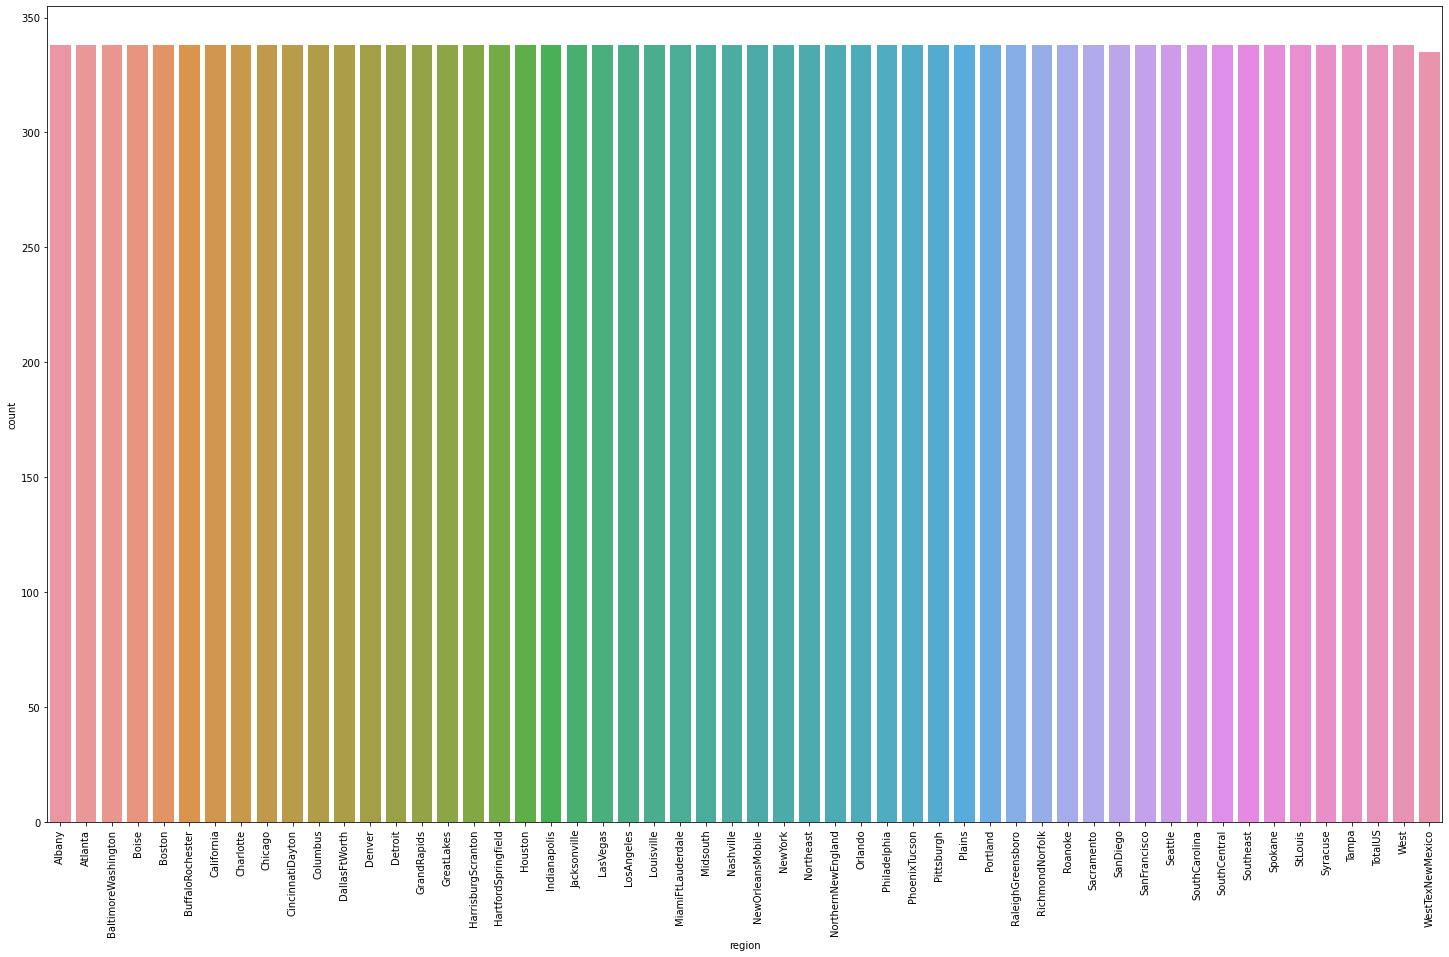

In [24]:
plt.figure(figsize=(25,15))
count1=sns.countplot(dfmain['region'])
count1.set_xticklabels(count1.get_xticklabels(), rotation=90)

<br><font face = "Muller Text" size = "3"> <b> It would be interesting to see how our target variable Average Price will vary with time. Let's see in the below analysis 

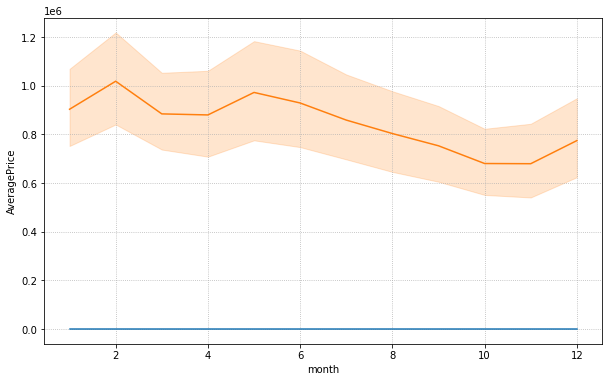

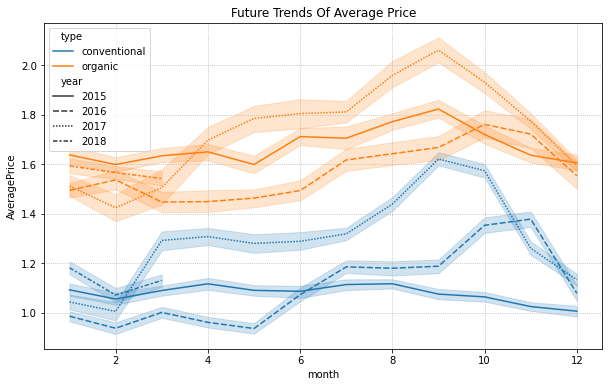

In [25]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,6
sns.lineplot(x = 'month', y = 'AveragePrice' , data = dfmain)
plt.grid(True, linestyle = ':')
plt.show

sns.lineplot(x= 'month', y = 'Total Volume', data = dfmain)
plt.grid(True, linestyle=':')
plt.show()

sns.lineplot(x= 'month', y = 'AveragePrice', data = dfmain, hue = 'type' , style = 'year')
plt.grid(True, linestyle= ':')
plt.title('Future Trends Of Average Price')
plt.show()

<br><font face = "Arial" size = "2"> <b> We have made a few observations after the visual analysis that will help us further 

Just like basic supply and demand laws when the price decreases the supply of avocadoes increases

The price of normal avocadoes is lower and organic ones 



# 7) Checking for Skew and removing the outliers 

In [26]:
dfmain.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
month            0.106617
dtype: float64

In [27]:
from scipy.stats import zscore 

z_score = zscore(dfmain [['Total Volume', '4046', '4225','4770','Total Bags','Large Bags','XLarge Bags']])
fin_z_score = np.abs(z_score)
filter_entry = (fin_z_score < 1.0).all(axis=1)
df1= dfmain[filter_entry]

In [28]:
df1.shape

(16624, 13)

In [29]:
dfmain.shape

(18249, 13)

In [30]:
dataloss = ((18249-16624)/18249)*100
dataloss

8.90459751219245

In [31]:
df1.skew()

AveragePrice    0.525800
Total Volume    3.034371
4046            3.733937
4225            3.476103
4770            4.960302
Total Bags      3.815687
Small Bags      4.251393
Large Bags      3.700425
XLarge Bags     5.298847
year            0.218395
month           0.091702
dtype: float64

# 8) Performing Encoding 


<br><font face = "Arial" size = "2"> <b> We perform encoding so that the data that is categorical in nature can be converted to numerical value thereby making it easier for the machine learning model to fit it 

In [32]:
from sklearn.preprocessing import LabelEncoder
la =LabelEncoder()
df1['region']=la.fit_transform(df1['region'])

In [33]:
df1['region'].value_counts()

0     338
5     338
37    338
38    338
16    338
23    338
39    338
24    338
40    338
41    338
10    338
26    338
42    338
27    338
44    338
30    338
31    338
21    338
7     338
2     338
3     338
32    338
48    338
1     338
17    338
49    338
34    338
50    338
47    338
19    338
20    338
4     338
33    337
43    337
9     337
14    335
36    334
53    332
11    330
28    326
35    323
13    318
18    315
12    290
8     279
25    230
22    195
46    181
15    174
52    170
29    169
45    169
6     169
51    158
Name: region, dtype: int64

In [34]:
la = LabelEncoder()
df1['type']= la.fit_transform(df1['type'])

In [35]:
df1['type'].value_counts()

1    9112
0    7512
Name: type, dtype: int64

# 9) Seperating features and labels 


In [36]:
feature = df1.drop(columns=['AveragePrice', 'year'], axis = 1)
label = df1.AveragePrice

# 10) Correlation and Multicollinearity 

<AxesSubplot:>

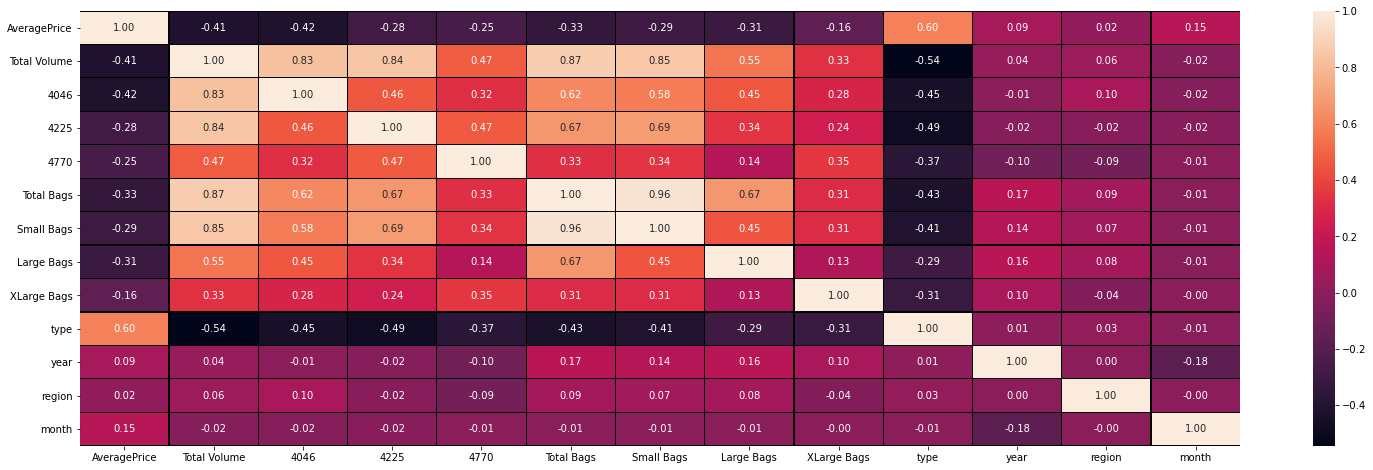

In [37]:
plt.figure(figsize=(26,8))
sns.heatmap(df1.corr(), annot= True, linewidths=0.2, linecolor="Black", fmt="0.2f")

In [38]:
df1.corr()['AveragePrice'].sort_values() #Correlation with target variable 

4046           -0.421856
Total Volume   -0.411686
Total Bags     -0.334515
Large Bags     -0.308661
Small Bags     -0.291134
4225           -0.277363
4770           -0.252265
XLarge Bags    -0.158576
region          0.018860
year            0.092248
month           0.154405
type            0.595734
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

In [39]:
feature.corrwith(label)

Total Volume   -0.411686
4046           -0.421856
4225           -0.277363
4770           -0.252265
Total Bags     -0.334515
Small Bags     -0.291134
Large Bags     -0.308661
XLarge Bags    -0.158576
type            0.595734
region          0.018860
month           0.154405
dtype: float64

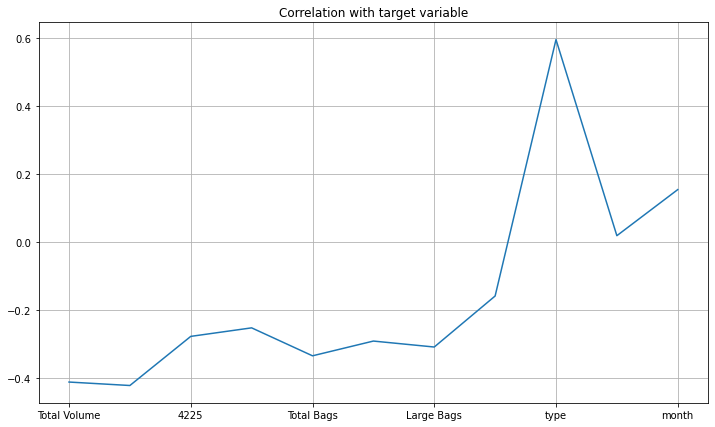

In [40]:
feature.corrwith(label).plot(kind='line',grid=True,figsize=(12,7), # Correlation with lable by graphical representation
title='Correlation with target variable')
plt.show()

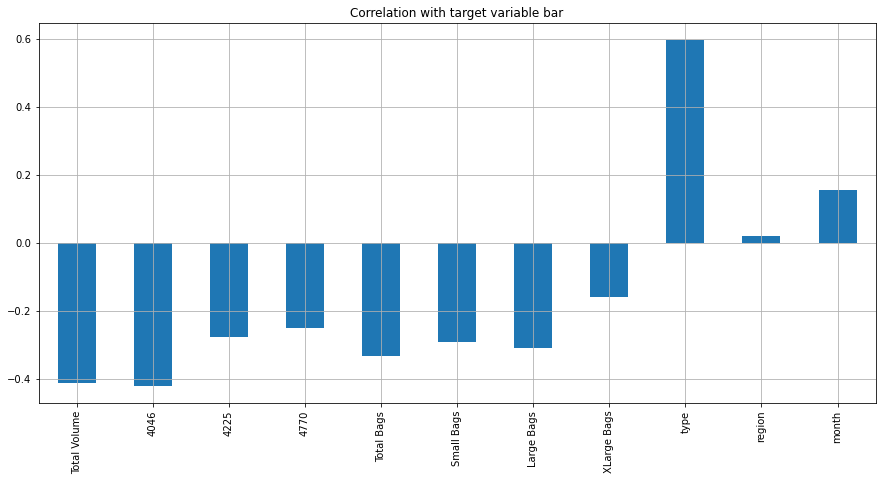

In [41]:
feature.corrwith(label).plot(kind='bar',grid=True,figsize=(15,7), # Correlation with lable by graphical representation
title='Correlation with target variable bar')
plt.show()

# 11) Checking for highly correlated features 



In [42]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [43]:
corr_features = correlation(df1, 0.75)
len(set(corr_features))

4

In [44]:
corr_features #These are the features that are highly correlated with target variable 

{'4046', '4225', 'Small Bags', 'Total Bags'}

In [45]:
f2=feature.drop(labels=corr_features,axis=1)

In [46]:
f2

,Total Volume,4770,Large Bags,XLarge Bags,type,region,month
0,64236.62,48.16,93.25,0.0,0,0,12
1,54876.98,58.33,97.49,0.0,0,0,12
2,118220.22,130.50,103.14,0.0,0,0,12
3,78992.15,72.58,133.76,0.0,0,0,12
4,51039.60,75.78,197.69,0.0,0,0,11
...,...,...,...,...,...,...,...
18244,17074.83,0.00,431.85,0.0,1,53,2
18245,13888.04,0.00,324.80,0.0,1,53,1
18246,13766.76,727.94,42.31,0.0,1,53,1
18247,16205.22,727.01,50.00,0.0,1,53,1


# 12) Checking for VIF 

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def CVIF(Data):
    vif = dict()
    vif["FeatureColumns"] = Data.columns
    vif["VIF"] = [variance_inflation_factor(Data.values, i) for i in range(Data.shape[1])]
    return(pd.DataFrame(vif))



CVIF(f2)

,FeatureColumns,VIF
0,Total Volume,2.872862
1,4770,1.586443
2,Large Bags,1.782627
3,XLarge Bags,1.297442
4,type,2.334350
5,region,2.986805
6,month,2.792104


<br><font face = "Arial" size = "2"> <b> Standard value for VIF is 5 so anything less than 5 means that multicolinnearity problem is less. closer to 0 means the problem is less anything above 5 means multicollinearity issue is not been solved 

# 13) Data Scaling 

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
f_scaled = scaler.fit_transform(f2)

In [49]:
f_scaled.shape

(16624, 7)

# 14) Feature Selection 

In [50]:
from sklearn. feature_selection import SelectKBest, f_regression
best_features = SelectKBest(score_func=f_regression, k=10) #k informs us about how many features we wanna select out of them all 
fit= best_features.fit (feature,label)

df_scores = pd.DataFrame (fit.scores_)
df_columns= pd.DataFrame (feature.columns)
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature_Name', 'Score'] 

print (feature_scores.nlargest (10, 'Score'))

    Feature_Name        Score
8           type  9144.494580
1           4046  3598.484364
0   Total Volume  3392.089245
4     Total Bags  2094.365818
6     Large Bags  1750.363802
5     Small Bags  1539.335545
2           4225  1385.305012
3           4770  1129.675735
7    XLarge Bags   428.765036
10         month   405.964291


# 15 ) Train and Test Dataset 

In [51]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [52]:
maxAccu=0
lrm=LinearRegression()
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(f2,label,test_size=0.3,random_state=i)
    lrm = LinearRegression()
    lrm.fit(x_train, y_train)
    pred=lrm.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.42562652030303816 on random state 50


In [53]:
x_train, x_test, y_train, y_test = train_test_split(f2, label, test_size=0.3, random_state=133)

# 16) Building and Selecting the Best Model 

In [54]:
#Random Forest Regressor 

rf = RandomForestRegressor(n_estimators=1000)
rf.fit(x_train, y_train)
predictrf=rf.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predictrf)),2))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predictrf)),2))
print('mean absolute error:',round((mean_absolute_error(y_test,predictrf)),2))

r2 score is : 0.79
RMSE: 0.18
mean absolute error: 0.13


In [55]:
#Ridge Model 

rd=Ridge(alpha=0.001)
rd.fit(x_train,y_train)
predictrd=rd.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predictrd)),2))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predictrd)),2))
print('mean absolute error:',round((mean_absolute_error(y_test,predictrd)),2))

r2 score is : 0.41
RMSE: 0.31
mean absolute error: 0.24


In [56]:
#Lasso model

ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
predictls=ls.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predictls)),2))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predictls)),2))
print('mean absolute error:',round((mean_absolute_error(y_test,predictls)),2))

r2 score is : 0.41
RMSE: 0.31
mean absolute error: 0.24


In [57]:
#Elastic Net

els=ElasticNet(alpha=0.0001)
els.fit(x_train,y_train)
predictels=ls.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predictels)),2))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predictels)),2))
print('mean absolute error:',round((mean_absolute_error(y_test,predictels)),2))

r2 score is : 0.41
RMSE: 0.31
mean absolute error: 0.24


In [58]:
#SVR model 

from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train, y_train)
predictsvr=svr.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predictsvr)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predictsvr)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predictsvr)),3))

r2 score is : 0.343
RMSE: 0.326
mean absolute error: 0.25


In [59]:
#Ada Boost Regressor  

adf = AdaBoostRegressor(n_estimators=1000)
adf.fit(x_train, y_train)
predictadf=adf.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predictadf)),2))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predictadf)),2))
print('mean absolute error:',round((mean_absolute_error(y_test,predictadf)),2))

r2 score is : 0.42
RMSE: 0.31
mean absolute error: 0.25


### Therefore the best model is Random Forest Regressor model 

<br><font face = "Arial" size = "2"> <b> We have came to this conclusion because we firstly took one model and that model was our Linear regression model one of the basic ones. It gave us a certain accuracy. 
    
Now we continued our model testing with using a few mother models such as SVR, Ridge, Lasso, Random Forest Regressor , Ada Boost , Elastic Net Regressor etc after applying all these models and considering RMSE score and mean absolute error we have come to the conclusion that for this particular data set is Random Forest Regressor model 

# 17) Hyperparameter Tuning for the Best Model 

In [60]:
X = df1.drop(columns=['AveragePrice','4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags' , 'XLarge Bags', 'year'], axis=1)
y = df1.AveragePrice

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [62]:
#Using Grid Search

def grid_search():
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)
    model = RandomForestRegressor()
    grid_vals = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1]}
    grid_lr = GridSearchCV(estimator=model, param_grid=grid_vals, scoring='accuracy', 
                        cv=2, refit=True, return_train_score=True)
    grid_lr.fit(X_train, y_train)
    preds = grid_lr.best_estimator_.predict(X_test)   
    return preds       

In [ ]:
print(grid_search())

In [64]:
#Using Random Search

def random_search():
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)
    model = RandomForestRegressor()
    param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100, 200, 300, 400]}
    random_rf = RandomizedSearchCV(estimator=model, param_distributions=param_vals,
                                n_iter=10, scoring='accuracy', cv=2,
                                refit=True, n_jobs=-1)
    random_rf.fit(X_train, y_train)
    preds = random_rf.best_estimator_.predict(X_test)
    return preds

In [65]:
print(random_search())

[1.5173 1.4863 1.1907 ... 1.1081 1.5762 1.8077]
